# Test different classes.

This notebook serves as a test for the different classes that are used in the solution.
Advanced users can use this notebook to test the classes and see how they work.

In [71]:
import DataDLC
import importlib
import numpy as np

In [47]:
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\Usuario\\Documents\\Documents\\MVA\\Stage\\DLCProject\\Code\\GitHubRep\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

### DataDLC class:

`DataDLC.py` is a core module for loading, preprocessing, and cleaning data from pose estimation .h5 files. This class is designed to handle the raw coordinates of tracked body parts and prepares the data for further analysis, including building graphs for pose-based analysis. Here’s an overview of the class and its main methods:

Class: DataDLC
Handles loading and preprocessing data from .h5 files generated from pose estimation models like DeepLabCut.
Stores key attributes such as the number of individuals, body parts, and frames.
Processes and cleans coordinates to ensure data consistency and prepares it for downstream tasks.
The DataDLC class also includes various methods for data imputation, statistical analysis, and visualization. These functionalities enable handling missing data, creating videos for better visualization of the tracked points, and saving the processed data.
Main Methods:

- **`__init__(self, file: str, detect_jumps: bool = False)`**: Initializes the DataDLC class by loading data from the specified .h5 file and optionally detecting and correcting isolated jumps.

- **`load_data(self, detect_jumps: bool)`**: Loads data from the provided file, extracts coordinates for each individual, computes the center of mass, and handles NaN values and isolated jumps.

- **`compute_center_of_mass(self)`**: Calculates the center of mass for each individual, excluding tail points to focus on core body parts.

- **`clean_inconsistent_nans(self)`**: Ensures that if either the x or y coordinate of a body part is NaN, the entire coordinate set for that frame is set to NaN.

- **`fill_nans(self)`**: Fills NaN values with zeros for consistency in further analysis.

- **`detect_isolated_jumps(self, threshold_soft_min: int, threshold_soft_max: int, imputation: bool)`**: Detects isolated jumps in time-series data using thresholds for minimal and maximal jumps, and optionally imputes these jumps using linear interpolation.

- **`remove_outlier_tracklets(self, threshold_split_tracklets: int, threshold_jump: int, percentage_gap_neigh: float, verbose: bool)`**: Identifies and removes outlier tracklets that deviate significantly from neighboring tracklets.

- **`detect_tracklets(self, x, y, threshold: int)`**: Detects tracklets (continuous segments of valid data points) in the time-series data based on specified thresholds.

- **`entropy_of_masks(self, mask1, mask2)`**:Calculates the entropy between two masks, which can be used to compare differences between two datasets.

- **`drop_tail_bodyparts(self)`**:Removes body parts corresponding to the tail from the dataset before building the graph, reducing the data dimensions for specific analyses.

- **`create_video(self, video_path, output_path, plot_prev_coords=False, frames=None)`**:Creates a video showing the tracked body parts of each individual over time.
Includes options to plot previous coordinates and specify a range of frames to process.

- **`get_statistics_on_jumps(self, plot=False)`**:Computes the mean and standard deviation of jumps between consecutive points, assuming a Gaussian distribution for jumps.
If `plot=True`, displays a histogram of the jumps for better visualization.

- **`create_video_per_event(self, video_path, output_path, events, split_behaviour=False)`**:Generates videos highlighting specific events on each frame.
If split_behaviour=True, creates separate videos for each event; otherwise, it overlays all events on a single video.
Useful for visualizing behavior annotations alongside the tracked points.

- **`save(self, path)`**:Saves the processed data back into an `.h5` file, preserving the changes made during analysis.
Ensures compatibility with other tools by storing the data in a structured format.

**Instanciate the class and load the data from the .h5 file**

At the moment of creating this, only some warnings are displayed omn the cell below.

In [57]:
# DLC data file
data_file = r'c:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoader_Baseline_models\DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5'

# Load DLC data
data = DataDLC.DataDLC(data_file)

Here we have loaded the data from the .h5 file and we can see the number of individuals, body parts, and frames.

We have now:
- data.scorer: the scorer used to track the body parts
- data.individuals: the identities of the individuals
- data.coords_per_ind: the coordinates per individual
- added the center of mass for each individual
- data.coords: the coordinates of the individuals
- data.n_individuals: the number of individuals
- data.bodyparts: the body parts
- data.n_bodyparts: the number of body parts
- data.n_frames: the number of frames
- We have cleaned inconsistent NaNs and filled the NaNs with zeros.
- data.old_coords: the old coordinates of the individuals

Let's check the data.

Let's **start** with attributes

In [58]:
print('Scorer: ', data.scorer)
print('Individuals: ', data.individuals)
print('Number of individuals: ', len(data.individuals))
print('Body parts: ', data.body_parts)
print('Number of body parts: ', len(data.body_parts))
print('Frames: ', data.n_frames)

Scorer:  Index(['DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000'], dtype='object', name='scorer')
Individuals:  Index(['individual1', 'individual2'], dtype='object', name='individuals')
Number of individuals:  2
Body parts:  Index(['Center', 'Center_head', 'Left_bhip', 'Left_ear', 'Left_fhip',
       'Left_mid', 'Nose', 'Right_bhip', 'Right_ear', 'Right_fhip',
       'Right_mid', 'Spine_1', 'Spine_1-center', 'Spine_2', 'Spine_2-base',
       'Spine_center-2', 'Tail_1', 'Tail_2', 'Tail_3', 'Tail_4', 'Tail_base',
       'Tail_tip', 'Center of mass'],
      dtype='object', name='bodyparts')
Number of body parts:  23
Frames:  2632


In [59]:
data.coords

individuals individual1                                                   \
bodyparts          Nose                     Left_ear                       
coords                x        y likelihood        x        y likelihood   
0               463.645  230.792       1.00  448.042  239.981        1.0   
1               480.133  232.318       1.00  454.027  239.981        1.0   
2               483.530  232.355       1.00  456.126  239.981        1.0   
3               492.657  238.880       1.00  457.610  239.197        1.0   
4               493.866  238.880       1.00  458.820  237.522        1.0   
...                 ...      ...        ...      ...      ...        ...   
2627             28.011  220.118       1.00   87.086  225.465        1.0   
2628             23.396  221.826       1.00   79.521  228.326        1.0   
2629             15.486  226.980       1.00   69.052  231.628        1.0   
2630              5.396  226.980       1.00   64.054  231.628        1.0   
2631              0.000  226.980       0.01   57.520  231.628        1.0   

individuals                                            ... individual2  \
bodyparts   Right_ear                     Center_head  ...      Tail_3   
coords              x        y likelihood           x  ...  likelihood   
0             471.811  258.065        1.0     461.198  ...         1.0   
1             478.082  258.225        1.0     473.689  ...         1.0   
2             478.814  258.914        1.0     475.822  ...         1.0   
3             479.213  258.225        1.0     476.587  ...         1.0   
4             479.213  258.065        1.0     477.547  ...         1.0   
...               ...      ...        ...         ...  ...         ...   
2627           80.954  186.788        1.0      59.809  ...         1.0   
2628           69.843  187.814        1.0      56.785  ...         1.0   
2629           64.237  193.070        1.0      46.343  ...         1.0   
2630           57.252  193.070        1.0      42.097  ...         1.0   
2631           41.680  193.070        1.0      28.863  ...         1.0   

individuals                                                            \
bodyparts     Tail_4                     Tail_tip                       
coords             x        y likelihood        x        y likelihood   
0            534.194  111.355        1.0  502.960   93.832        1.0   
1            534.260  111.355        1.0  503.452   94.505        1.0   
2            534.413  111.355        1.0  505.016   94.505        1.0   
3            534.260  110.160        1.0  503.622   93.832        1.0   
4            534.413  109.502        1.0  505.016   90.859        1.0   
...              ...      ...        ...      ...      ...        ...   
2627         305.513  182.163        1.0  322.396  160.185        1.0   
2628         275.399  207.746        1.0  298.747  193.379        1.0   
2629         244.614  213.009        1.0  251.322  305.954        1.0   
2630         236.508  213.009        1.0  250.527  305.954        1.0   
2631         220.321  213.009        1.0  249.403  305.954        1.0   

individuals                                        
bodyparts   Center of mass                         
coords                   x           y likelihood  
0               514.954709  297.711000   0.941765  
1               515.549882  297.987725   1.000000  
2               516.259294  298.025137   0.941765  
3               516.886897  297.290294   1.000000  
4               517.471529  296.748588   1.000000  
...                    ...         ...        ...  
2627            242.775471  109.099412   1.000000  
2628            246.313941  109.120118   1.000000  
2629            249.601765  107.116118   1.000000  
2630            249.232529  105.413118   1.000000  
2631            248.691294  102.628941   1.000000  

[2632 rows x 138 columns]

In [60]:
data.coords_per_indv[0]

bodyparts     Nose                     Left_ear                     Right_ear  \
coords           x        y likelihood        x        y likelihood         x   
0          463.645  230.792       1.00  448.042  239.981        1.0   471.811   
1          480.133  232.318       1.00  454.027  239.981        1.0   478.082   
2          483.530  232.355       1.00  456.126  239.981        1.0   478.814   
3          492.657  238.880       1.00  457.610  239.197        1.0   479.213   
4          493.866  238.880       1.00  458.820  237.522        1.0   479.213   
...            ...      ...        ...      ...      ...        ...       ...   
2627        28.011  220.118       1.00   87.086  225.465        1.0    80.954   
2628        23.396  221.826       1.00   79.521  228.326        1.0    69.843   
2629        15.486  226.980       1.00   69.052  231.628        1.0    64.237   
2630         5.396  226.980       1.00   64.054  231.628        1.0    57.252   
2631         0.000  226.980       0.01   57.520  231.628        1.0    41.680   

bodyparts                     Center_head  ...     Tail_3   Tail_4           \
coords           y likelihood           x  ... likelihood        x        y   
0          258.065        1.0     461.198  ...        1.0  260.278  337.937   
1          258.225        1.0     473.689  ...        1.0  261.650  337.937   
2          258.914        1.0     475.822  ...        1.0  263.745  338.597   
3          258.225        1.0     476.587  ...        1.0  264.364  337.937   
4          258.065        1.0     477.547  ...        1.0  264.364  339.180   
...            ...        ...         ...  ...        ...      ...      ...   
2627       186.788        1.0      59.809  ...        1.0  247.369  289.478   
2628       187.814        1.0      56.785  ...        1.0  246.247  289.478   
2629       193.070        1.0      46.343  ...        1.0  245.876  285.059   
2630       193.070        1.0      42.097  ...        1.0  241.985  277.059   
2631       193.070        1.0      28.863  ...        1.0  235.098  219.928   

bodyparts            Tail_tip                     Center of mass              \
coords    likelihood        x        y likelihood              x           y   
0                1.0  240.202  315.603        1.0     428.288235  291.855588   
1                1.0  242.000  315.863        1.0     431.527720  292.177941   
2                1.0  243.666  317.158        1.0     432.450838  292.480095   
3                1.0  246.715  317.158        1.0     434.351661  291.870213   
4                1.0  247.814  317.473        1.0     431.878437  291.240412   
...              ...      ...      ...        ...            ...         ...   
2627             1.0  250.968  318.755        1.0     110.228412  203.209000   
2628             1.0  250.914  317.957        1.0     106.402824  203.349176   
2629             1.0  250.745  240.090        1.0     101.993059  205.056765   
2630             1.0  250.728  240.067        1.0      94.709412  204.806059   
2631             1.0  235.988  236.970        1.0      84.978824  204.113000   

bodyparts             
coords    likelihood  
0           1.000000  
1           0.941765  
2           1.000000  
3           0.941765  
4           0.941765  
...              ...  
2627        1.000000  
2628        1.000000  
2629        1.000000  
2630        1.000000  
2631        0.941765  

[2632 rows x 69 columns]

We **now** check the NaNs.

In [61]:
for ind in data.individuals:
    for body_part in data.body_parts:
        print(data.coords[ind][body_part].isna().any().any())
        break
    break

False


The cell below will should not display anything if the data is clean. If there are NaNs, they will be displayed.

In [62]:
def check_inconcistencies_nans(data):
    '''' Check if a bodyparts with NaNs have all the coordinates as NaNs '''
    for ind in data.individuals:
        for body_part in data.body_parts:
            if data.coords[ind][body_part].isna().any().any() & data.coords[ind][body_part].isna().all().all():
                print('Inconsistency in individual: ', ind, ' body part: ', body_part)
                print(data.coords[ind][body_part])
             
check_inconcistencies_nans(data)

**Finally**, we check the jumps detection.

In [63]:
data.get_statistics_on_jumps?

Signature: data.get_statistics_on_jumps(plot=False, individual=None, body_part=None)
Docstring:
This function will give the mean and standard deviation of the jumps between points for adjency frames. This assumes Gaussian distribution jumps.

Args:
    plot (bool): If True, the histogram of the jumps will be plotted.
    individual (str): The individual to get the statistics. If None, the statistics for all the individuals will be computed.
    body_part (str): The body part to get the statistics. If None, the statistics for all the body parts will be computed.

Returns:
    diff (np.ndarray): The jumps between points for adjency frames. 
File:      c:\users\usuario\documents\documents\mva\stage\dlcproject\code\githubrep\behavioral_tagging_of_mice_in_multiple_mice_dataset_using_deep_learning\src\datadlc.py
Type:      method

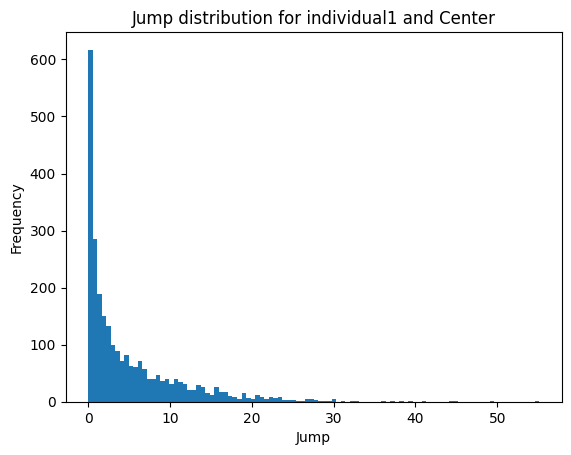

Mean of the jumps for individual1 and Center: 5.045440447408166
Standard deviation of the jumps for individual1 and Center: 6.343873246497405


0            NaN
1       0.886738
2       0.417000
3       0.018385
4       0.639132
          ...   
2627    1.500729
2628    4.761059
2629    3.761703
2630    8.245000
2631    8.916000
Length: 2632, dtype: float64

In [64]:
data.get_statistics_on_jumps(plot=True)

In [65]:
data.detect_isolated_jumps()

In [72]:
def check_jumps(data):
    print('There were ', data.mask_jumps.sum().sum(), ' jumps detected')
    for ind in data.individuals:
        for part in data.body_parts:
            if data.mask_jumps[ind][part].sum() > 0:
                print('Thers a jump in individual', ind, 'part', part, 'at frames', np.where(data.mask_jumps[ind][part])[0])

In [73]:
check_jumps(data)

There were  19  jumps detected
Thers a jump in individual individual1 part Right_ear at frames [1248 1249]
Thers a jump in individual individual1 part Right_mid at frames [2473]
Thers a jump in individual individual1 part Tail_2 at frames [972]
Thers a jump in individual individual1 part Tail_3 at frames [2490]
Thers a jump in individual individual1 part Tail_4 at frames [362]
Thers a jump in individual individual2 part Left_mid at frames [ 747 1104]
Thers a jump in individual individual2 part Right_mid at frames [ 650 1593]
Thers a jump in individual individual2 part Tail_1 at frames [588 589]
Thers a jump in individual individual2 part Tail_2 at frames [ 380 2576]
Thers a jump in individual individual2 part Tail_3 at frames [ 660 1238 1239]
Thers a jump in individual individual2 part Tail_tip at frames [595 608]


In [74]:
data.remove_outlier_tracklets(verbose=True)

Outlier tracklet detected between 1580 and 1582  of individual individual1 and body part Center_head
	 Jump between tracklet is 141.25351772256863
Outlier tracklet detected between 2504 and 2506  of individual individual1 and body part Center_head
	 Jump between tracklet is 102.40680632165032
Outlier tracklet detected between 2508 and 2508  of individual individual1 and body part Center_head
	 Jump between tracklet is 71.866
Outlier tracklet detected between 1653 and 1656  of individual individual1 and body part Left_bhip
	 Jump between tracklet is 117.85033688963301
Outlier tracklet detected between 20 and 22  of individual individual1 and body part Left_ear
	 Jump between tracklet is 113.71085669363329
Outlier tracklet detected between 1122 and 1127  of individual individual1 and body part Left_ear
	 Jump between tracklet is 240.70969715406147
Outlier tracklet detected between 1128 and 1237  of individual individual1 and body part Left_ear
	 Jump between tracklet is 254.4151546508187

In [75]:
check_jumps(data)

There were  2299  jumps detected
Thers a jump in individual individual1 part Center_head at frames [1580 1581 1582 2504 2505 2506 2508]
Thers a jump in individual individual1 part Left_bhip at frames [1653 1654 1655 1656]
Thers a jump in individual individual1 part Left_ear at frames [  20   21   22 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132
 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146
 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160
 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174
 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188
 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202
 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216
 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230
 1231 1232 1233 1234 1235 1236 1237 1579 1580 1612 1714 1715 1716 1717
 1718]
Thers a jump in individual individual1 part Left_fhip at frames [ 572


<style>
  
        .green-background {
        background-color: #4a6741;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="green-background">
    ALL IS WORKING FINE 
    
    .


### 